                                                                             Pahul Brar, Damien Fung, Steve Kim, Rafi Meher

Title: Taking a look at Vehicular/Pedestrian accidents in the neighbourhoods of Vancouver

Introduction: Pedestrians are some of the most vulnerable users of roadways. On average, in British Columbia, around 50 pedestrians are killed and 2,400 are injured in around 2,700 crashes every year, based on a five-year average of data collected by ICBC between 2016 and 2020 (ICBC, 2021).​​ Nearly half of these deaths occur between October and January, likely due to decreased daylight and poor weather conditions. Governments and law enforcement are using various safety campaigns to try and deal with these issues, it is possible that more can be done to reduce pedestrian deaths in key regions in Metro Vancouver. 
 
The question understudy for our project is: "Are certain neighbourhoods more prone to vehicle collisions in the City of Vancouver?" The dataset we are planning on using was made available to us by the VPD, and it contains information on all crimes committed from 2003 to 2022 (VPD, 2022). We intend to look at neighbourhood-specific data across the city and we will specifically look at the “Vehicle Collision or Pedestrian Struck with Fatality” and “Vehicle Collision or Pedestrian Struck with Injury” related data. While the data values include both vehicle-to-vehicle collisions and pedestrian/cyclist strikes together, the description notes that vehicle-to-vehicle incidents are fewer in number when compared to the overall data set. We want to see if there is any discernible pattern for the neighbourhoods that have higher collision rates, such as if the neighbourhoods have lower government funding, lower socioeconomic status, or if collision rates are more evenly spread.
 
An article by Sarah Fecht in Scientific American that looked into road designs in Montreal found that “traffic injuries are four to six times higher in low-income areas of Montreal, compared with wealthy neighbourhoods” (Fecht, 2012). Fecht notes that there may be “many explanations for social inequalities in traffic injuries, including differences in the prevalence of drunk driving, use of helmets and safety restraints, and driving speeds”. However, citing a 2011 study on the influence of traffic volume and road design (Morency et al., 2012), Fetch suggests that “street environment” may also carry a large part of the blame”. As this would be a serious concern that could be mitigated through direct intervention, we wanted to further explore whether this may also be occurring in Vancouver as well.
 
We plan on using the mean number of collisions and the standard deviation (SD) to approach this question. The mean will highlight the average number of collisions, and having a lower SD would indicate that our mean value is appropriate to make conclusions from, as the values are all clustered closer to it. We will also compare the median against the mean to explore the presence of any outliers that may affect our results. If that is the case, we will likely use the median value instead in order to reduce the effect of outliers in the data. We may also decide to look at the proportions of collisions and see if that plays a part or not. 

In [1]:
#Preliminary Results: 

set.seed(1)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Rows: 818120 Columns: 10

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (7): YEAR, MONTH, DAY, HOUR, MINUTE, X, Y


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



TYPE,NEIGHBOURHOOD,YEAR
<chr>,<chr>,<dbl>
Break and Enter Commercial,Oakridge,2012
Break and Enter Commercial,Fairview,2019
Break and Enter Commercial,West End,2019
Break and Enter Commercial,West End,2021
Break and Enter Commercial,West End,2014
Break and Enter Commercial,West End,2020


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


mean_crime_rate
<dbl>
34082.92


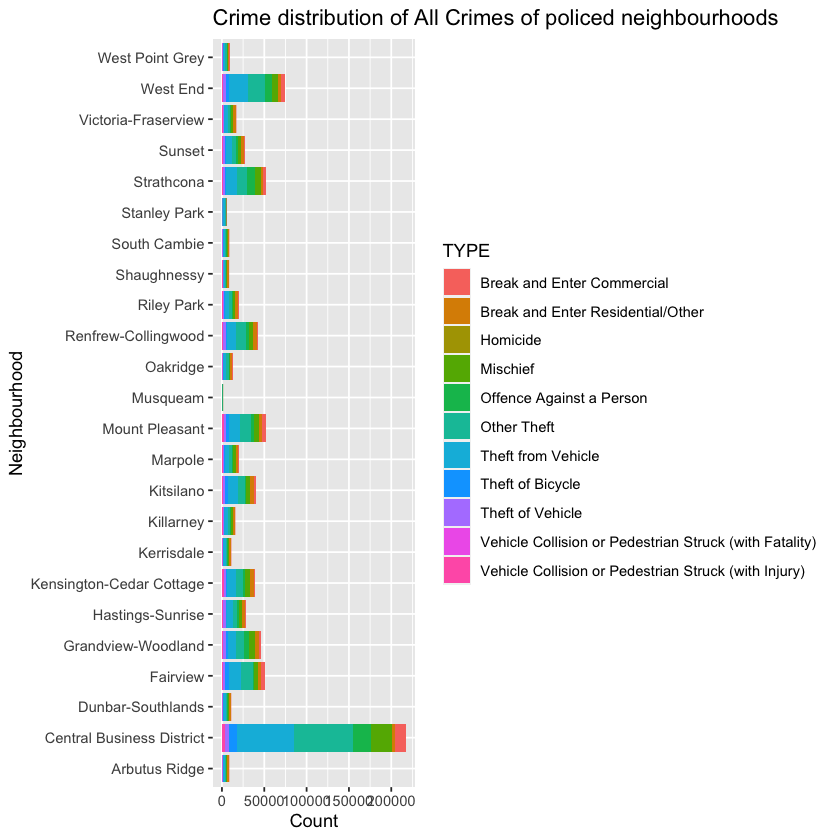

In [2]:
whole_dataset <- read_csv("https://raw.githubusercontent.com/pbrar17/group_14/main/crime_data.csv") %>%
    filter(!is.na(NEIGHBOURHOOD))

whole_dataset <- select(whole_dataset, TYPE, NEIGHBOURHOOD, YEAR) %>%
    group_by(NEIGHBOURHOOD) %>% 
    group_by(YEAR)

head(whole_dataset)


crime_dist_neighbours <- whole_dataset %>% 
    ggplot(aes(x = NEIGHBOURHOOD, fill = TYPE)) + 
    geom_histogram(stat = "count")+
    xlab("Neighbourhood") +
    ylab("Count") +
    ggtitle("Crime distribution of All Crimes of policed neighbourhoods") +
    coord_flip()
    
crime_dist_neighbours


mean_crime_rate <- whole_dataset %>%
    ungroup(YEAR) %>%
    summarize(mean_crime_rate = (length(TYPE)/ length(unique(NEIGHBOURHOOD))))

mean_crime_rate 
#This is the "mean" crime rate per neighbourhood policed.

TYPE,NEIGHBOURHOOD,YEAR
<chr>,<chr>,<dbl>
Vehicle Collision or Pedestrian Struck (with Fatality),Central Business District,2005
Vehicle Collision or Pedestrian Struck (with Fatality),Central Business District,2005
Vehicle Collision or Pedestrian Struck (with Fatality),West End,2009
Vehicle Collision or Pedestrian Struck (with Fatality),Sunset,2006
Vehicle Collision or Pedestrian Struck (with Fatality),Kensington-Cedar Cottage,2018
Vehicle Collision or Pedestrian Struck (with Fatality),Sunset,2015


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


[1] 1153.042

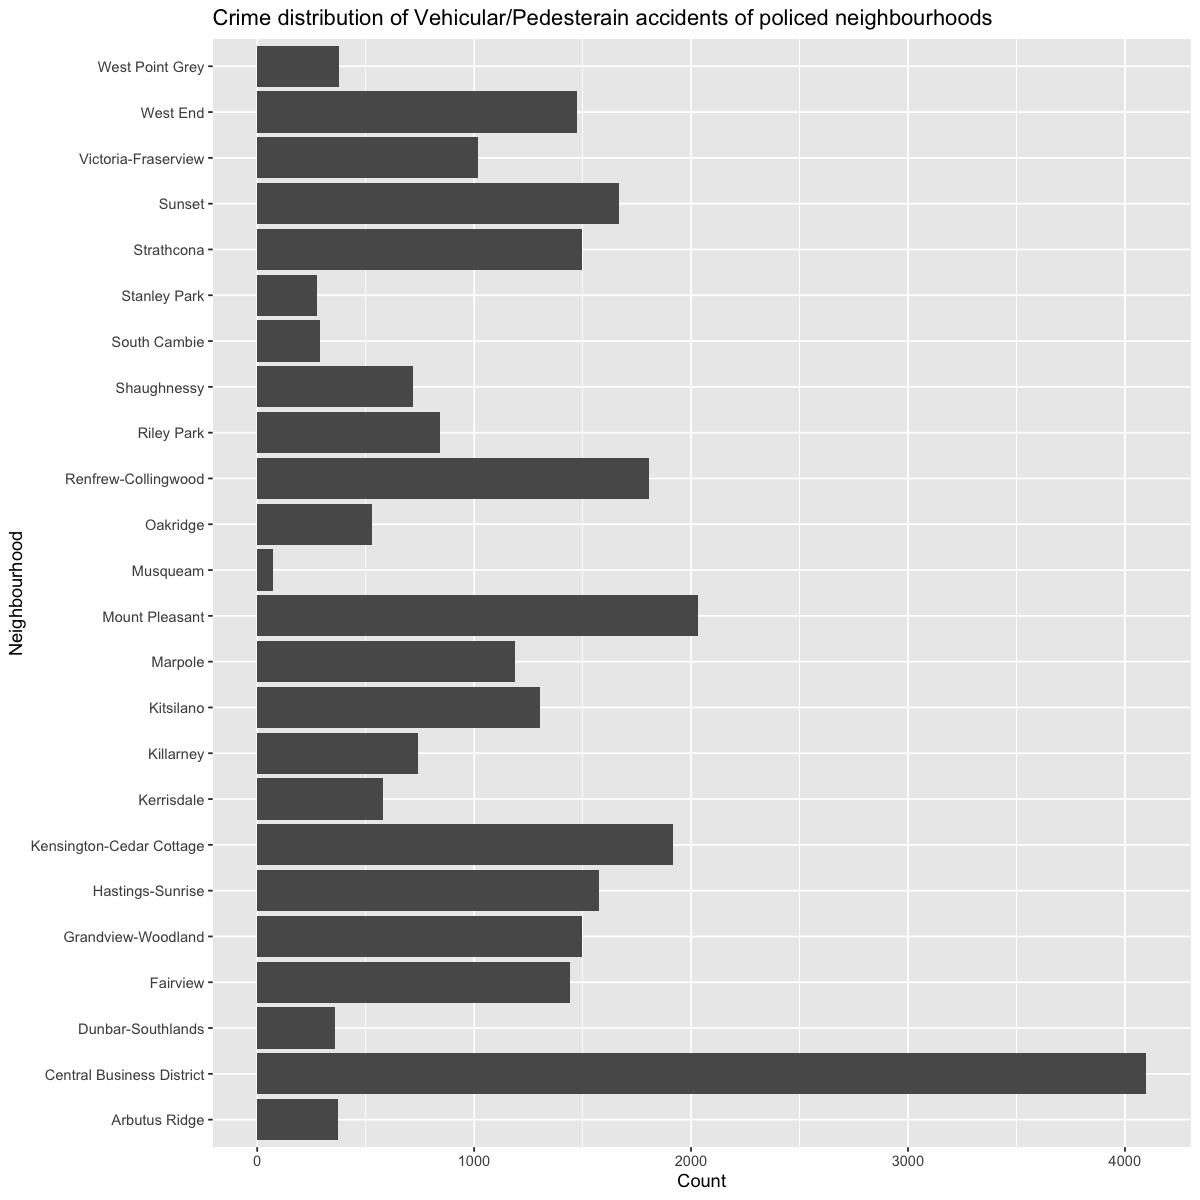

In [3]:
limited_dataset <- select(whole_dataset, TYPE, NEIGHBOURHOOD, YEAR) %>%
    group_by(NEIGHBOURHOOD) %>% 
    group_by(YEAR) %>%
    filter(TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)" | 
    TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)")
head(limited_dataset)

options(repr.plot.width = 10, repr.plot.height = 10)
vehicular_ped_dist <- limited_dataset %>% 
    ggplot(aes(x = NEIGHBOURHOOD, colour = YEAR)) + 
    geom_histogram(stat = "count")+
    xlab("Neighbourhood") +
    ylab("Count") +
    ggtitle("Crime distribution of Vehicular/Pedesterain accidents of policed neighbourhoods") +
    coord_flip()
vehicular_ped_dist

mean_vehicle_crime_rate <- length(limited_dataset$TYPE) / length(unique(limited_dataset$NEIGHBOURHOOD))
mean_vehicle_crime_rate 
#This is the "mean" Vehicle/Pedestrian crime rate per neighbourhood policed.

Methods: Plan
As our source data was obtained through the official government database, our analysis is representative of the true population and is relatively unbiased. While some types of crime may often go unreported (Baumer & Lauritsen, 2010), we feel that vehicle collisions are more often reported to police and insurance agencies, and thus this data is reasonably representative. The reproducibility of our results will also ensure that our conclusions are trustworthy and reliable.
 
However, these results will not be sufficient for a stakeholder and a more thorough analysis will be required. We plan to perform statistical testing, through Pearson's Chi-Squared test at a 95% confidence interval, as we develop our project. 
Namely:

$H_0:$ Vehical/pedestrian accidents for all neighbourhoods occur at the same rate to one another

$H_A:$ Vehical/pedestrian accidents for all neighbourhoods do not occur at the same rate to one another
 
Through our preliminary results, we expect to reject $H_0$ at a 5% significance level as the Central Business District has a far higher rate of accidents compared to all other neighbourhoods.
	
We expect to get a better understanding of how our current road designs are affecting collision rates in the city. These results can help city planners determine if certain neighbourhoods require additional safety infrastructure in addition to determining which areas require additional resources to reduce collision rates immediately. This information may also motivate the City of Vancouver to prioritize renewal plans for older areas and “poorer” areas of the city. This information could also be used by researchers developing self-driving technologies to reduce the chance of the vehicle being involved in such an incident. Furthermore, this project may lead to further questions on other factors that also increase the likelihood of vehicle collisions, such as specific weather or daylight conditions. This would account for a possible confounding variable.


In [4]:
#Results:
mean_crime <- whole_dataset %>%
    group_by(NEIGHBOURHOOD) %>%
    summarize(mean_crime = mean(TYPE == "Vehicle Collision or Pedestrian Struck (with Injury)" | 
    TYPE == "Vehicle Collision or Pedestrian Struck (with Fatality)"))
mean_crime
max(mean_crime$mean_crime)

NEIGHBOURHOOD,mean_crime
<chr>,<dbl>
Arbutus Ridge,0.04231248
Central Business District,0.01885144
Dunbar-Southlands,0.03301974
Fairview,0.02831190
Grandview-Woodland,0.03217210
Hastings-Sunrise,0.05502409
Kensington-Cedar Cottage,0.04916058
Kerrisdale,0.05326587
Killarney,0.04746002


[1] 0.08699878

It appears as if Shaughnessy has the highest proportion of Vehicle Collision or Pedestrian Struck (with Injury/Fatality) compared to all crime that was reported in that area.

To verify our intuition, we perform Pearson's Chi Squared Test. From the above cells, we know that the expected value ($E_k$) / mean ($\mu$) frequency is approximately 1153. Now we can compute the Chi Squared test statistic 
${\chi}^2=\sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k} \sim {\chi}^2_{k-1}$ 
Where k is the number of categories (neighbourhoods), and n is the number of observations

The following cells demonstrate the full process of the Pearson's Chi Squared Test

In this cell, we compute the number of categories $k$ (in this case, the categories are the number of neighbourhoods) and the number of observations $n$

In [5]:
count_crime <- limited_dataset %>%
    group_by(NEIGHBOURHOOD) %>%
    count(NEIGHBOURHOOD) %>%
    pull(n) # turn column into vector for easier computations
#This is the observed number of crimes reproted in each neighbourhood in question

k <- length(count_crime) 
# This is the number of neighbourhoods.

Now, we have all the necessary information to compute the Chi-Squared test statistic $\chi^2$. 

In [6]:
test_stat <- 0
for (o in count_crime) { # summation function to obtain the Chi-Squared test statistic is achieved through a basic for-each loop
    test_stat = test_stat + (o - mean_vehicle_crime_rate)^2/mean_vehicle_crime_rate
}
test_stat

[1] 14804.4

As the test statistic has an extremely high value, we can infer that the p-value will be negligibly small, to confirm this intuition, we can use the `pchisq()` function with $k-1$ degrees of freedom

In [7]:
p_value <- pchisq(test_stat, k-1, lower.tail = FALSE)
p_value

[1] 0

For a sanity check we can use the `chisq.test()` function

In [11]:
chisq.test(count_crime)


	Chi-squared test for given probabilities

data:  count_crime
X-squared = 14804, df = 23, p-value < 2.2e-16


In [9]:
chisq.test(count_crime)


	Chi-squared test for given probabilities

data:  count_crime
X-squared = 14804, df = 23, p-value < 2.2e-16


Since our P-value is negligibly small ($<2.2\cdot10^{-16}\approx 0$), we know it is also less than $0.05$, thus we can reject the null hypothesis at a $5\%$ significant level in favour of the alternative hypothesis that vehical/pedestrian accidents for all neighbourhoods do not occur at the same rate to one another. This implies that certain neighbourhoods have higher rates of vehical/pedestrial accidents compared to others.

References:

Baumer, E. P., & Lauritsen, J. L. (2010). Reporting Crime to the Police, 1973–2005: A Multivariate Analysis of Long-Term Trends in the National Crime Survey (ncs) and National Crime Victimization Survey (ncvs)*. Criminology, 48(1), 131–185. https://doi.org/10.1111/j.1745-9125.2010.00182.x

Fecht, S. (n.d.). Accident-Zone: Poorer Neighborhoods Have Less-Safe Road Designs. Scientific American. Retrieved March 5, 2022, from https://www.scientificamerican.com/article/accident-zone-poorer-neighborhoods/

ICBC. (2021, October 19). ICBC warns about seasonal spike in pedestrian crashes. https://www.icbc.com:443/about-icbc/newsroom/Pages/2021-oct19.aspx

Morency, P., Gauvin, L., Plante, C., Fournier, M., & Morency, C. (2012). Neighborhood Social Inequalities in Road Traffic Injuries: The Influence of Traffic Volume and Road Design. American Journal of Public Health, 102(6), 1112–1119. https://doi.org/10.2105/AJPH.2011.300528

VPD. (2022). Vancouver Police Department Open Data. https://geodash.vpd.ca/opendata/#
